In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [3]:
cereal=pd.read_csv('cereal.csv')

In [5]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [6]:
cereal.shape

(77, 16)

In [19]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [22]:
criteria_1 = cereal["carbo"] < 0
criteria_2 = cereal["sugars"] < 0
criteria_3 = cereal["potass"] < 0


cereal[criteria_1|criteria_2|criteria_3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [17]:
cereal_cor=cereal.corr()

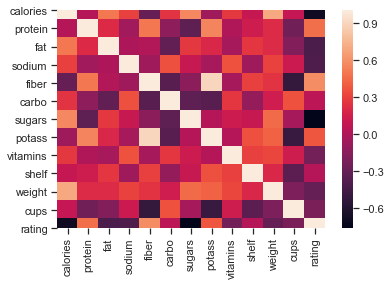

In [18]:
sns.heatmap(data=cereal_cor)

In [25]:
cereal["mfr"].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [ ]:
# "A":"American Home Food Products",
#                "G":"General Mills",
#                "K":"Kelloggs",
#                "N":"Nabisco",
#                "P":"Post",
#                "Q":"Quaker Oats",
#                "R":"Ralston Purina"
                

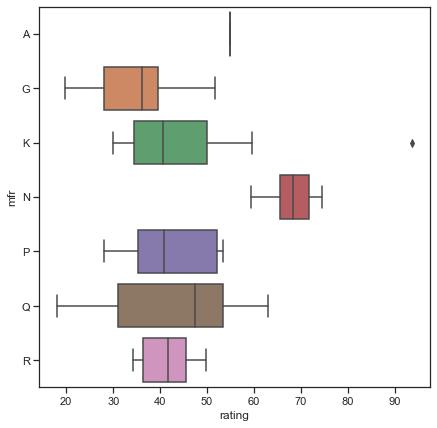

In [32]:
fig, ax = plt.subplots(figsize = (7,7))
sns.boxplot(y='mfr',x='rating',data = cereal.sort_values("mfr"))

Text(0.5, 1.03, 'Rating vs. Calories, Fiber, and Sugars')

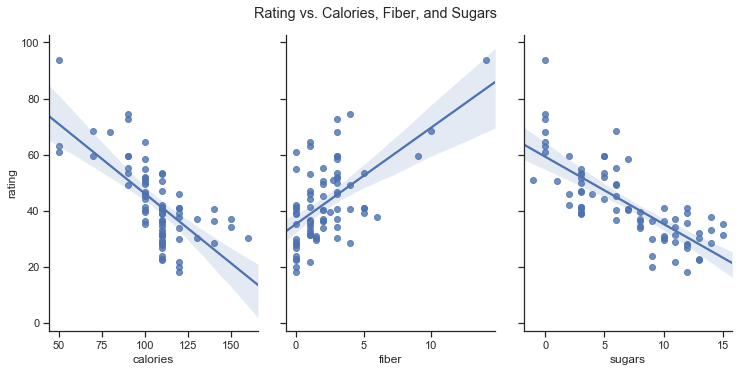

In [14]:
ax_3pairs = sns.pairplot(cereal, x_vars=['calories','fiber','sugars'], 
                         y_vars='rating', height=5, aspect=0.7, kind='reg')

ax_3pairs.fig.suptitle('Rating vs. Calories, Fiber, and Sugars', y=1.03)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [35]:
X = cereal[["calories","protein","fat","sugars"]]
y = cereal["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [59]:
r2_4 = r2_score(y_test, y_pred)
r2_4

0.7741570184725922

In [61]:
X = cereal[["calories","protein","fat","sugars","carbo"]]
y = cereal["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [62]:
r2_5 = r2_score(y_test, y_pred)
r2_5

0.33913037557169223

In [64]:
X = cereal[["calories","protein","fat","sugars","potass"]]
y = cereal["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [65]:
r2_6 = r2_score(y_test, y_pred)
r2_6

0.7765030172509289

In [66]:
X = cereal[['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins']]
y = cereal["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [67]:
r2_all = r2_score(y_test, y_pred)
r2_all

0.9999999999999997